<a href="https://colab.research.google.com/github/deepvasan02/MNIST-Digit-Recognition/blob/main/MNIST_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#Importing the necessary libraries and modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


In [53]:
#Loading the dataset
from keras.datasets import mnist
(X_train, y_train),(X_test,y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [54]:
#Scale images to the [0,1] range
X_train = X_train.astype('float32')/255
X_test  = X_test.astype('float32')/255


#Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

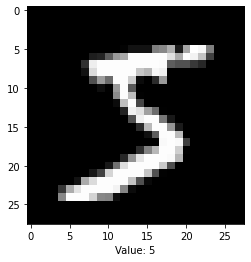

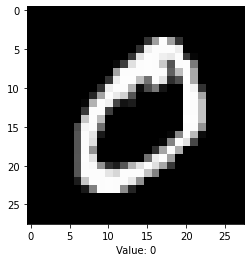

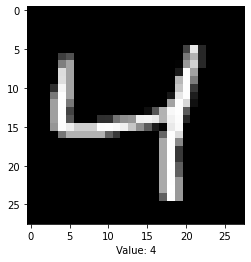

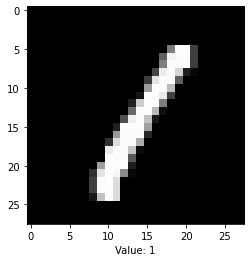

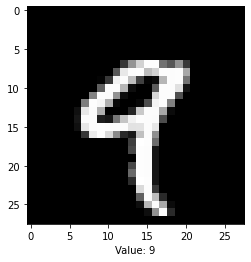

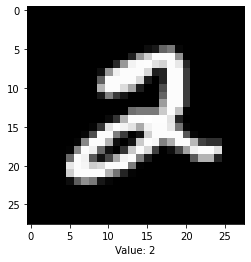

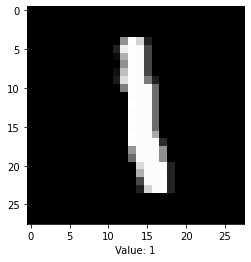

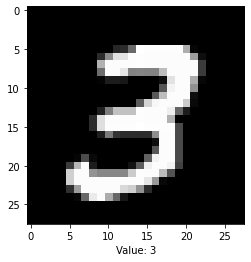

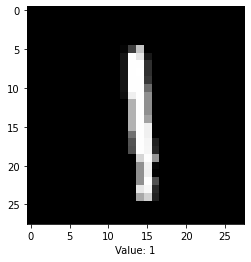

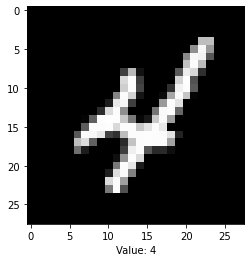

In [55]:
#Viewing the samples
for i in range(10):
    plt.imshow(X_train[i], cmap = 'gray')
    plt.xlabel("Value: {}".format(y_train[i].argmax()))
    plt.show()

In [56]:
#Reshaping the images
X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_test = X_test.reshape((X_test.shape[0],28,28,1))
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [57]:
#Building the model
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(64, kernel_size =(3,3),activation = 'relu', input_shape = (28,28,1)),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(128, kernel_size =(3,3),activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Conv2D(64, kernel_size =(3,3),activation = 'relu'),
    layers.Flatten(),
    layers.Dropout(0.6),
    
    layers.Dense(128, activation = 'relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation = 'softmax')
    
])


In [58]:
#Summarizing the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 64)          73792     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 576)              

In [59]:
#Training the model
batch_size = 128
epochs = 20

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs,verbose=1 , validation_data=(X_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5197 - accuracy: 0.8346 - val_loss: 0.0924 - val_accuracy: 0.9732
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0806 - accuracy: 0.9740 - val_loss: 0.0291 - val_accuracy: 0.9905
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.0309 - val_accuracy: 0.9890
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0455 - accuracy: 0.9857 - val_loss: 0.0371 - val_accuracy: 0.9885
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.0249 - val_accuracy: 0.9931
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0376 - accuracy: 0.9881 - val_loss: 0.0226 - val_accuracy: 0.9925
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0351 - accuracy: 0.9890 - val_loss: 0.0213 - val_accuracy: 0.9936
Epoch 

In [60]:
# Finding the accuracy of our model
score = model.evaluate(X_test, y_test)
print("Loss: {}".format(score[0]))
print("Accuracy: {}".format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0303 - accuracy: 0.9925
Loss: 0.030323544517159462
Accuracy: 0.9925000071525574


In [61]:
#Reshape to make predictions
X_test = X_test.reshape((X_test.shape[0],28,28,1))

In [62]:
print(X_test.shape)

(10000, 28, 28, 1)


In [63]:
#Predictions
predictions = model.predict(X_test)
predictions_img = np.argmax(predictions, axis=-1)

In [64]:
#Reshaping the images
X_train = X_train.reshape((X_train.shape[0],28,28))
X_test = X_test.reshape((X_test.shape[0],28,28))
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


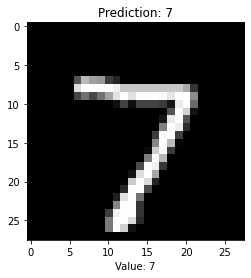

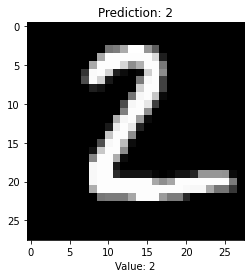

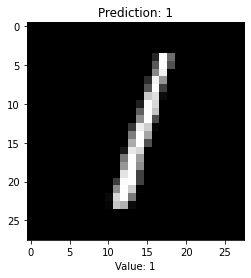

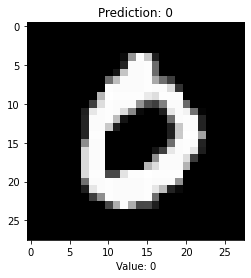

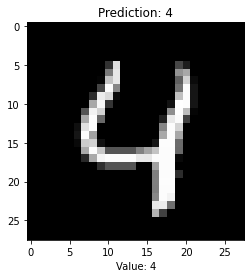

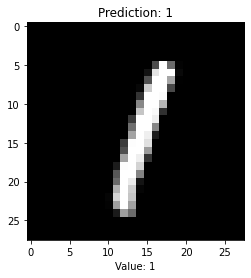

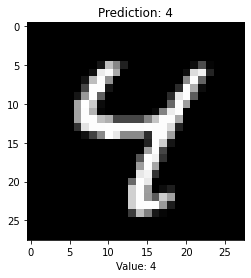

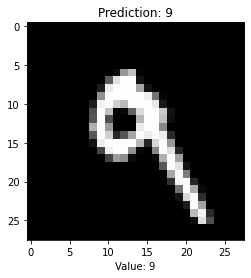

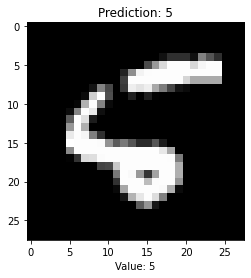

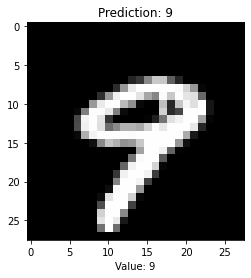

In [65]:
#Viewing our predictions
for i in range(10):
    plt.imshow(X_test[i], cmap = 'gray')
    plt.xlabel("Value: {}".format(y_test[i].argmax()))
    plt.title("Prediction: {}".format(predictions_img[i]))
    plt.show()
    

In [66]:
# :)